In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


import My_Image_Functions1
import Two_Mode_Section_Files 


Initial Total_Resources 60.0

Minimum Resouces test
------------------------------------------------------------------
Minimal_Allocation is: 3
(Maximal_Allocation is: 19 )
Total_Resources After minumum resource allocation Test 60

Maximum Resouces test
------------------------------------------------------------------
Maximal_Allocation is: 27
(Minimal_Allocation is: 11 )
Total_Resources After maximum resource allocation Test 60
Current_Resource_Allocation [15 15 15 15]
____________________________________________________
Iteration 1 \ 10
Current_Resource_Allocation [15 15 15 15]
Run Summary:
---------------------------------------------------------------------
CurrentCost is: 8999.45245543975 After Running Iteration 1 \ 10
the Random_Search_exponential_Growth_Factors are : 2.0 2.0 2.0 2.0
the Targeted_Search_exponential_Growth_Factor is: 0 0 0 0
---------------------------------------------------------------------

____________________________________________________
Iteration 2 \ 10

(1000, 1000)


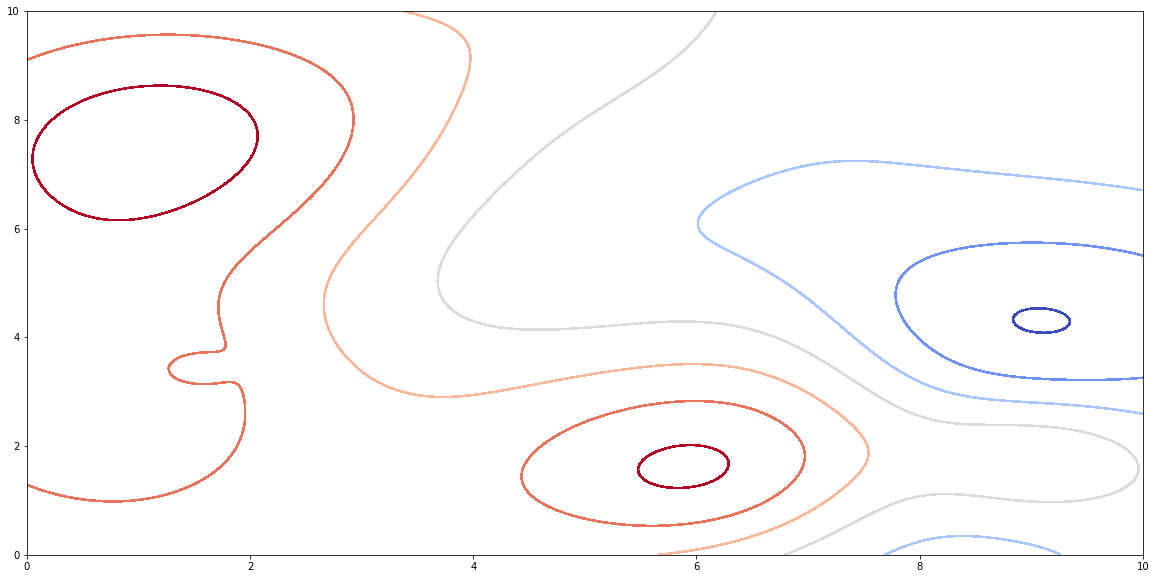

In [4]:
def Create_Animation_From_png_files_in_Folder(image_folder,Video_name,fps):

    import cv2
    import os


    video_name = Video_name + '.avi'
    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    
    # images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape
    video = cv2.VideoWriter(video_name, -1, fps, (width,height))        
    for i in range (0,len(images)):
        image = "image" + str(i) + ".png"
        video.write(cv2.imread(os.path.join(image_folder, image)))
    
    cv2.destroyAllWindows()
    video.release()
    print('Video Created')


    
    



def Record_video_from_computer_camera():

    ## Press "q" when done

    import numpy as np
    import cv2

    cap = cv2.VideoCapture(0)
    out = cv2.VideoWriter('output.avi', -1, 20.0, (640,480))

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            frame = cv2.flip(frame,0)

            # write the flipped frame
            out.write(frame)

            cv2.imshow('frame',frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break

    # Release everything if job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()





def Create_Animation_From_png_files_in_Folder(image_folder,Video_name,fps):

    import cv2
    import os


    video_name = Video_name + '.avi'
    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    
    # images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape
    video = cv2.VideoWriter(video_name, -1, fps, (width,height))

        
    for i in range (0,len(images)):
        image = "image" + str(i) + ".png"
        video.write(cv2.imread(os.path.join(image_folder, image)))
    
    cv2.destroyAllWindows()
    video.release()
    print('Video Created')


    
    
def Calculate_Random_Surface_Potential_at_Point(u,v,A ,Sigma,X_Center,Y_Center):

    z = np.zeros((u.shape))
    for i in range (0,Number_Of_Random_Peaks):
        z = z + A[i]*np.exp(-((u-X_Center[i])**2)/Sigma[i] -((v-Y_Center[i])**2)/Sigma[i])


    return z






def Gereate_Random_Surface(x,y,A ,Sigma,X_Center,Y_Center):
    z = np.zeros((x.shape))
    for i in range (0,Number_Of_Random_Peaks):
        z = z + A[i]*np.exp(-((x-X_Center[i])**2)/Sigma[i] -((y-Y_Center[i])**2)/Sigma[i])
    return z



def Gereate_Random_Surface_Parameters(x,y):
    Number_Of_Random_Peaks = 20
    Amplitude_Range_Of_Peaks = 20
    Width_Range_Of_Peaks = 10
    X_Center_Bias = 5
    X_Center_Range = 10
    Y_Center_Bias = 5
    Y_Center_Range = 10


    A = Amplitude_Range_Of_Peaks*(np.random.rand(Number_Of_Random_Peaks) - 0.5)
    Sigma = Width_Range_Of_Peaks*np.random.rand(Number_Of_Random_Peaks)
    X_Center = X_Center_Bias + X_Center_Range*(np.random.rand(Number_Of_Random_Peaks) - 0.5)
    Y_Center = Y_Center_Bias + Y_Center_Range*(np.random.rand(Number_Of_Random_Peaks) - 0.5)

    return A ,Sigma,X_Center,Y_Center,Number_Of_Random_Peaks



x = np.linspace(0,10,1000)
y = np.linspace(0,10,1000)

x,y = np.meshgrid(x,y)

A ,Sigma,X_Center,Y_Center,Number_Of_Random_Peaks = Gereate_Random_Surface_Parameters(x,y)

z = Gereate_Random_Surface(x,y,A ,Sigma,X_Center,Y_Center)
print(np.zeros((z.shape)).shape)


fig = plt.figure(figsize=(20,10))
ax = fig.gca()
surf = ax.contour(x,y,z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)




In [5]:
# def fun(x):
#     return np.sum((x-2)**2)


def fun(x):
    return Calculate_Random_Surface_Potential_at_Point(x[0],x[1],A ,Sigma,X_Center,Y_Center)
    
    
Total_Iterations = 20
x0 = 5 + 1*(np.random.rand(2)-0.5)
Optimization_Iterations = 1 ## Parallel iterations for each run of the algorithm
print_Cost = 0


print("Function Value Before Optimization",fun(x0))
xmin = Two_Mode_Section_Files.Optimize(fun,x0,Total_Iterations,print_Cost)
print("Function Value After Optimization",fun(xmin))


x_1 = x0
def Re_Initialize_Problem():
    x0 = 5 + 1*(np.random.rand(2)-0.5)
    

    z = Gereate_Random_Surface(x,y,A ,Sigma,X_Center,Y_Center)
    return x0,z


I = np.where(z == z.min())
I1 = I[0][0]
I2 = I[1][0]
x_global_Minima = x[I1,I2]
y_global_Minima = y[I1,I2]


Cost_Vector = np.zeros(Total_Iterations)
k = 0
for i in range(0,Total_Iterations):
    k +=1
    if k  > 20:
        if np.abs(np.mean(Cost_Vector[i-6:i-1]) - Cost_Vector[i-1]) < 10**-8:

            A ,Sigma,X_Center,Y_Center,Number_Of_Random_Peaks = Gereate_Random_Surface_Parameters(x,y)
            x0,z = Re_Initialize_Problem()
            x_1 = x0

            
            I = np.where(z == z.min())
            I1 = I[0][0]
            I2 = I[1][0]
            x_global_Minima = x[I1,I2]
            y_global_Minima = y[I1,I2]
            k = 0
            
            print("")
            print("Re Initializeing:")
            print("---------------------------------------")
            print("Now the Global Minima is at",np.min(z))
            
            
    print(fun(x_1)) 
    
    Cost_Vector[i] = fun(x_1)
    x_1 = Two_Mode_Section_Files.Optimize(fun,x_1,Optimization_Iterations,print_Cost)
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    surf = ax.contour(x,y,z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.scatter(x_1[0],x_1[1],linewidth=5,label='Two Mode Section')
    ax.scatter(x_global_Minima,y_global_Minima,linewidth=4,label='Global Minimum')
    
    plt.title('Comparing Different Optimization Algorithms')
    ax.legend()
    plt.xlim(0,10)
    plt.ylim(0,10)
    plt.close(fig) ## this makes sure it is not displayed
    
    
    Folder_path = r'C:\Users\benjy\OneDrive\Brown\Research\Orchestra Optimization Algorithm\Visualizing_Optimization_Algorithms\Photos\image'
    Folder_path1 = Folder_path.replace('\\','/')
    filename = Folder_path1  + str(i) + '.png'
    fig.savefig(filename)

    

print("Creating Video") 
Create_Animation_From_png_files_in_Folder('Photos','movie1',10)

Function Value Before Optimization -1.058703649991362
Function Value After Optimization -7.600253021975561
-1.058703649991362
-2.341614287918262
-7.200348866009863
-7.5981286357771705
-7.599877055207926
-7.600325219009019
-7.600327938330284
-7.600327938330284
-7.600327938330284
-7.600327938330284
-7.600327938330284
-7.600327938330284
-7.600327938330284
-7.600327938330284
-7.600327938330284
-7.600327945857834
-7.6003279548842375
-7.6003279548842375
-7.6003279548842375
-7.6003279548842375
Creating Video
Video Created


In [59]:
I = np.argmin(z)
print(I)
print(np.min(z))
# print(z[I])

I = np.where(z == z.min())
I1 = I[0][0]
I2 = I[1][0]

print(I[1][0])
print(np.min(z))
print(z[I1,I2])

766543
-7.250972037015484
543
-7.250972037015484
-7.250972037015484
